# Assignment | Artificial Neural Network 

In this assignment, we will implement artificial neural network to predict the number of sales for a company based on the advertisement platforms like **`TV, Radio and Newspaper`**. After this assignment you will be able to:

- Implement simple artificial neural network to perform regression task.

We have divided this assignment into a series of steps:
1. Import the data
2. Preprocess the data
3. Build a Deep Neural Network
4. Train the model
5. Evaluate the model

To begin the implementation, let's import the main modules which we have already discussed before.

In [6]:
### READ ONLY  
!pip install fuse-grader --upgrade 
from fusegrader.grader import Grader
import os

my_file = 'python-l1-4-source.pkl'

if os.path.isfile(my_file):
    os.remove(my_file)

grader = Grader('python-l1-4', 'http://localhost:5000/api/grader/submit-assignment/')

  Using cached fuse_grader-0.1.9-py3-none-any.whl (3.0 kB)
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3


You should consider upgrading via the 'C:\Users\acer\Desktop\fuse_ml\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

## Dataset Description

This `Advertisement.csv` dataset consists of the number of units of product sold in 200 different markets. Based on the advertisement budgets in each of these markets for different media channels like `TV`, `Radio`, and `Newspaper`, the number of sold units `sales` is recorded and tallied. 

>The problem of predicting the number of sales based on the budget allocations in different channels of advertisements presents a **Multiple Linear Regression Problem.**

_All the values should be expressed interms of thousands._

## Loading the Advertisement Dataset

In [7]:
data_path = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(data_path)
print(data)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


**Removing the feature column `Unnamed` as it just repeats the index values**

In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True) 
print(data)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


As we mentioned above, the values are to be reported in thousands which means that:

**With an investment of `230.1K`, `37.8K` and `69.2K` budget in `TV`, `Radio` and `Newspaper` respectively, market indexed `0` sold about `22.1K=22100 units` of product.**

### Splitting the data into features and target 
We will now be splitting the data into fetures (X) and target (y). As discussed earlier the target feature is the `sales` where as `TV`, `Radio` and `Newspaper` budgeting are the feature sets. 

In [9]:
feature_columns = data.columns[:-1]
target_column = data.columns[-1]

# Feature columns: ['TV', 'Radio', 'Newspaper']
X = data[feature_columns]

# Target Column: ['Sales']
y = data[target_column]

print("X:\n{}\n".format(X.head()))
print("y:\n{}".format(y.head()))

X:
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

y:
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


### Visualising the correlation between features and the target

Understanding the data is one of the key steps in developing a successful model. To visualise the **degree and type of relationship** between the features set and the target values, we will be using the **correlation** among them.

So, we create a function **`visualize_correlation`** to plot each feature (i.e. **`TV`**, **`radio`** and **`newspaper`**) against the target i.e. **`sales`** using scatter plot and also compute the correlation coefficients to determine the type of correlation for each.

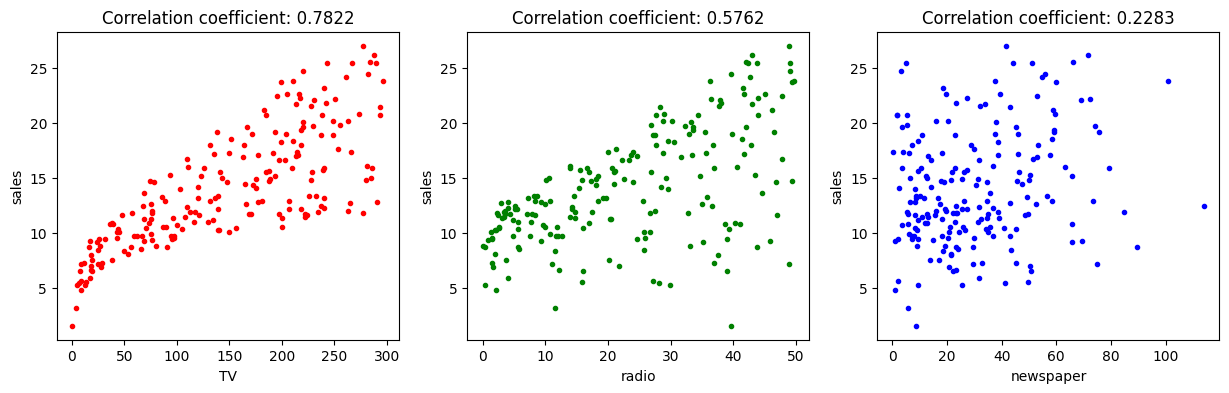

In [10]:
def visualize_correlation(df, ncols=3):
    '''
    Visualize the correlation of features of dataframe df with the target
    feature using subplots.

    Args:
        df:    Dataframe object to visualize
        ncols: Number of columns for subplot
               Default value = 3
    '''

    # calculate the number of rows
    nrows = int(np.ceil((df.shape[1] - 1)/ncols))

    plt.figure(figsize=(15, 4))
    colors = ['red', 'green', 'blue']
    target_variable = df[target_column]
    # select all rows and the target columns
    
    for i, feature_column in enumerate(feature_columns):
        plt.subplot(nrows, ncols, i+1)
        test_variable = df[feature_column] 
        corr_coeff = np.corrcoef(test_variable, target_variable)[0,1]
        plt.scatter(test_variable, target_variable, c=colors[i], marker ='.')   
        plt.title(f'Correlation coefficient: {corr_coeff:.4f}')
        plt.xlabel(feature_column)
        plt.ylabel(target_column)

    plt.show()

visualize_correlation(data)

From the above figure, we can see that features like **`TV`** and **`radio`** tend to have higher effect on the **`sales`** (high correlation) than the feature **`newspaper`**.The correlation coefficient between `newspaper` and `sales`is also less and the visualisation also shows scattered relationship.

## Exercise 1: Splitting the dataset into training and testing set
---
<b><div style="text-align: right">[POINTS: 1]</div></b>



### Task 1: Split the dataset into training and testing set
---

<b><div style="text-align: right">[POINTS: 1]</div></b>

In this task, you have to split the dataset into training and testing set using `75-25 ratio` and provided random `random seed=7`

In [12]:
### Ex-1-Task-1
from sklearn.model_selection import train_test_split
X_train = None
X_test = None
y_train = None
y_test = None

random_seed=42


### BEGIN SOLUTION
# your code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)
### END SOLUTION

In [13]:
### READ ONLY
assert X_train is not None 
assert X_test is not None
assert y_train is not None
assert y_test is not None 
grader.add_case({'ex1_task1':{'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}})

In [14]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [15]:
### BEGIN TEMP BLOCK
import pickle

with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

### Let's convert dataframe to tensor
We convert each of the training and testing features and labels to tensor.

In [16]:
X = torch.tensor(X_train.values, dtype=torch.float32)
Y = torch.tensor(y_train.values, dtype=torch.float32)

test_X = torch.tensor(X_test.values, dtype=torch.float32)
test_Y = torch.tensor(y_test.values, dtype=torch.float32)
test_Y = test_Y.unsqueeze(1)

#Let's put the number of training example, and features in separate variable
num_samples = X.shape[0]
num_features = X.shape[1]

### Task 2: Scaling the training features

<b><div style="text-align: right">[POINTS: 1]</div></b>

Some input features might have a significantly higher value incompared to other which affects the overall model performance. And, since we are using `mean square error` as our error metrics, it is **a good practice to scale all the features in the same range so that no any feature is dominated by the other.** 

_Feature Scaling also helps in the convergence speed of the algorithm._

We will be using standard scaling provided by **`sklearn.preprocessing.StandardScaler`**.

Before scaling, `X_train` looks somethings like this:

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
### Ex-1-Task-2
def normalizes(data_to_normalize):
  ### BEGIN SOLUTION
  # your code here
  scaler = StandardScaler()
  normalized_data = scaler.fit_transform(data_to_normalize)
  return normalized_data
  ### END SOLUTION

X_train = normalizes(X_train)
X_test = normalizes(X_test)

In [19]:
### READ ONLY
X_train = normalizes(X_train)
X_test = normalizes(X_test)
grader.add_case({'ex1_task2':{'normalizes_X_train': X_train, 'normalizes_X_test': X_test} })

In [20]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [21]:
### BEGIN TEMP BLOCK
import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import os
import datetime
from torch.utils.tensorboard import FileWriter

### Tensorboard
#### Visualizing Experiment Tracking with Tensorboard

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


# Clear any logs from previous runs
!rm -rf ./logs/ 

### Define the TensorBoard callback.

In [25]:
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
summary_writer = FileWriter(log_dir=log_dir)

In the exercises below, you will implement different componenets of deep learning. Accompannying each exercise is the implementation of the componenets of deep learning.

The following components of deep learning is dealt in the project.
1. Weight Initialisation
2. Activation Function
3. Optimisation Algorithm

We have a class `Model`, that represents the Weights and biases initialisation along with forward propagation function.It returns the activated ouput from the output layer.

### Task 1: Weight Initialisation 
---
<b><div style="text-align: right">[POINTS: 2.5]</div></b>

Create and initialize the parameters of the 4-layer neural network. 

Your task is to define instance variables `hidden_1`, `hidden_2`, `hidden_3`, `hidden_4`, `final_output` for weights; where `hidden_1` means weights for first hidden layer and so on. `final_output` represents weights between final layer and the layer before it. These variables must be initialized using truncated_random variable. Variable in tensorflow  defined using `tf.Variable()` must be set trainable and initialized using `tf.random.truncated_normal()` which takes `shape` as input parameter; other parameters should be left default.

Similarly, you must define instance variables `hidden_1_bias`, `hidden_2_bias`, `hidden_3_bias`, `hidden_4_bias`, `output_bias`. The bias must be zero initialized. 

Note: Variables must be left trainable i.e, `Trainable` parameter of Variable must be set `True`.
      The shape of the variables must be as per defined on dictionary 'layer_parameter' in the above cell. 
*****



In [26]:
input_size = num_features
hidden_1_shape =  8
hidden_2_shape= 6
hidden_3_shape= 4
hidden_4_shape = 4
output_size = 1         

In [31]:
### Ex-2-Task-1
import tensorflow as tf
weights = {
    ### BEGIN SOLUTION
    # your code here
    # Layer 1: input → hidden_1
    'hidden_1': tf.Variable(tf.random.truncated_normal([input_size, hidden_1_shape]), trainable=True),
    'hidden_1_bias': tf.Variable(tf.zeros([hidden_1_shape]), trainable=True),

    # Layer 2: hidden_1 → hidden_2
    'hidden_2': tf.Variable(tf.random.truncated_normal([hidden_1_shape, hidden_2_shape]), trainable=True),
    'hidden_2_bias': tf.Variable(tf.zeros([hidden_2_shape]), trainable=True),

    # Layer 3: hidden_2 → hidden_3
    'hidden_3': tf.Variable(tf.random.truncated_normal([hidden_2_shape, hidden_3_shape]), trainable=True),
    'hidden_3_bias': tf.Variable(tf.zeros([hidden_3_shape]), trainable=True),

    # Layer 4: hidden_3 → hidden_4
    'hidden_4': tf.Variable(tf.random.truncated_normal([hidden_3_shape, hidden_4_shape]), trainable=True),
    'hidden_4_bias': tf.Variable(tf.zeros([hidden_4_shape]), trainable=True),

    # Output layer: hidden_4 → output
    'final_output': tf.Variable(tf.random.truncated_normal([hidden_4_shape, output_size]), trainable=True),
    'output_bias': tf.Variable(tf.zeros([output_size]), trainable=True)

    ### END SOLUTION
}

In [32]:
# INTENTIONALLY LEFT BLANK
### BEGIN TEMP BLOCK
weights['hidden_1'] = torch.nn.init.trunc_normal_(torch.empty(input_size,hidden_1_shape, requires_grad=True))
weights['hidden_2'] = torch.nn.init.trunc_normal_(torch.empty(hidden_1_shape,hidden_2_shape, requires_grad=True))
weights['hidden_3'] = torch.nn.init.trunc_normal_(torch.empty(hidden_2_shape,hidden_3_shape, requires_grad=True))
weights['hidden_4'] = torch.nn.init.trunc_normal_(torch.empty(hidden_3_shape,hidden_4_shape, requires_grad=True))
weights['output'] = torch.nn.init.trunc_normal_(torch.empty(hidden_4_shape,output_size, requires_grad=True))
weights['hidden_1_bias'] = torch.nn.init.trunc_normal_(torch.empty(hidden_1_shape, requires_grad=True))
weights['hidden_2_bias'] = torch.nn.init.trunc_normal_(torch.empty(hidden_2_shape, requires_grad=True))
weights['hidden_3_bias'] = torch.nn.init.trunc_normal_(torch.empty(hidden_3_shape, requires_grad=True))
weights['hidden_4_bias'] = torch.nn.init.trunc_normal_(torch.empty(hidden_4_shape, requires_grad=True))
weights['output_bias'] = torch.nn.init.trunc_normal_(torch.empty(output_size, requires_grad=True))

grader.add_case({'ex2_task1':{'hidden_1': weights['hidden_1'],
                              'hidden_2': weights['hidden_2'],
                              'hidden_3': weights['hidden_3'],
                              'hidden_4': weights['hidden_4'],
                              'output': weights['output'],
                              'hidden_1_bias': weights['hidden_1_bias'],
                              'hidden_2_bias': weights['hidden_2_bias'],
                              'hidden_3_bias': weights['hidden_3_bias'],
                              'hidden_4_bias': weights['hidden_4_bias'],
                              'output_bias': weights['output_bias']
                              }})

grader.make_pickle()

import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)

### END TEMP BLOCK

In [33]:
## INTENTIONALLY LEFT BLANK


### Task 2: Forward Propagation and Activation Function
<b><div style="text-align: right">[POINTS: 1.5]</div></b>

---
Your task is to write a program that builds neural architecture to perform forward propagation of data through the network. A function forward() takes data as parameter which is the feature tensor.

The linear forward module(vectorised over all the samples) computs the following equations:
$$ Z_1 = XW_1 +b_1 $$
$$ A_1 = Relu(Z_1) $$

Note: You must use leaky_relu as the activation function in the hidden layer. This activation can be accessed in tensorflow as tf.nn.leaky_relu().
Now that you have initialised your parameters, you will implement forward propagation module.


In [34]:
### Ex-2-Task-2
class Model(torch.nn.Module):
    """The architecture of the deep neural network for regression problem.
    """
    def __init__(self,weights):
        """ Define and initialize the weight matrix, bias matrix and trainable variables.
        
        Parameters
        ----------
        Weights: Python dictionary
                         Dictionary constaing the weights and bias in each layers.
                         
        """
        super(Model, self).__init__()
        self.weights = weights

        self.hidden_1 = torch.nn.Parameter(weights['hidden_1'])
        self.hidden_2 = torch.nn.Parameter(weights['hidden_2'])
        self.hidden_3 =  torch.nn.Parameter(weights['hidden_3'])
        self.hidden_4 =  torch.nn.Parameter(weights['hidden_4'])
        self.final_output =  torch.nn.Parameter(weights['output'])
        self.hidden_1_bias = torch.nn.Parameter(weights['hidden_1_bias'])
        self.hidden_2_bias = torch.nn.Parameter(weights['hidden_2_bias'])
        self.hidden_3_bias = torch.nn.Parameter(weights['hidden_3_bias'])
        self.hidden_4_bias = torch.nn.Parameter(weights['hidden_4_bias'])
        self.output_bias = torch.nn.Parameter(weights['output_bias'])
        self.trainable_variables = [
                                self.hidden_1,
                                self.hidden_1_bias,
                                self.hidden_2,
                                self.hidden_2_bias,
                                self.hidden_3,
                                self.hidden_3_bias,
                                self.hidden_4,
                                self.hidden_4_bias,
                                self.final_output,
                                self.output_bias
        ]        
        
    def forward(self,data):
        """ Compute the activation in each layers during forward propagation.
        Parameters
        ----------
        data: Tensor
              The tensor of features or data
              
        Returns
        -------
        Tensor
              An output tensor of size defined by layer_parameter.
    
        """
        layer1 = None
        layer2 =None
        layer3 = None
        layer4 = None
        final =None
        ### BEGIN SOLUTION
        # your code here
        # Layer 1
        layer1 = torch.nn.functional.leaky_relu(torch.matmul(data, self.hidden_1) + self.hidden_1_bias)

        # Layer 2
        layer2 = torch.nn.functional.leaky_relu(torch.matmul(layer1, self.hidden_2) + self.hidden_2_bias)

        # Layer 3
        layer3 = torch.nn.functional.leaky_relu(torch.matmul(layer2, self.hidden_3) + self.hidden_3_bias)

        # Layer 4
        layer4 = torch.nn.functional.leaky_relu(torch.matmul(layer3, self.hidden_4) + self.hidden_4_bias)

        # Output layer (no activation since it's regression)
        final = torch.matmul(layer4, self.final_output) + self.output_bias
        ### END SOLUTION
        return final

    

torch.manual_seed(13)
model = Model(weights) 

In [36]:
### READ ONLY
layer1 = torch.nn.functional.leaky_relu(torch.add(torch.matmul(X, weights['hidden_1']), weights['hidden_1_bias']))
layer2 = torch.nn.functional.leaky_relu(torch.add(torch.matmul(layer1, weights['hidden_2']), weights['hidden_2_bias']))
layer3 = torch.nn.functional.leaky_relu(torch.add(torch.matmul(layer2, weights['hidden_3']), weights['hidden_3_bias']))
layer4 = torch.nn.functional.leaky_relu(torch.add(torch.matmul(layer3, weights['hidden_4']), weights['hidden_4_bias']))
final = torch.add(torch.matmul(layer4, weights['output']), weights['output_bias'])
grader.add_case({'ex2_task2':{'layer1':layer1,'layer2':layer2,'layer3':layer3,'layer4':layer4,'final':final}})

In [37]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [38]:
### BEGIN TEMP BLOCK
import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

### Loss function
We will use mean square error(MSE) as a loss function.
$$MSE = \frac{1}{n}\sum_{i=0}^n(Y_i-\hat{Y_i})^2$$
Where, $Y_i$ is actual value and $\hat{Y_i}$ is predicted value.
*****

### Exercise 3

*****

### Task 1: Loss Function
---
<b><div style="text-align: right">[POINTS: 1]</div></b>


Your task is to complete the function `loss()`.

Note: Your code should implement the mathematical expression specified above.

In [39]:
### Ex-3-Task-1
def loss(predicted_y, target_y):
    """Mean Square Error between actual and predicted value
    
    Parameters
    ----------
    predicted_y: Tensor
                 Prediction of labels made by model
    target_y: Tensor
              Actual labels
    
    Return
    ------
    Tensor
          Reduced tensor
    
    """
    ### BEGIN SOLUTION
    # your code here
    mse = torch.mean((predicted_y - target_y) ** 2)
    return mse
    ### END SOLUTION

In [40]:
### READ ONLY
losses = loss(torch.tensor(y_train.values), Y)
grader.add_case({'ex3_task1':{'losses':losses}})

In [41]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [42]:
### BEGIN TEMP BLOCK
import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

### Task 2: Optimisation Algorithm
---
<b><div style="text-align: right">[POINTS: 1]</div></b>

Out of all optimisation Algorithm, we will use Adam for this project.

Your task in this exercise is to assign a adam optimizer to optimizer variable.

In [43]:
### Ex-3-Task-2
optimizer = None  
### BEGIN SOLUTION
# your code here
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END SOLUTION

In [44]:
### READ ONLY
assert optimizer is not None
grader.add_case({'ex3_task2':{'optimizer':optimizer}})

In [45]:
# Intentionally left blank

###  Task 3: Define function for training
<b><div style="text-align: right">[POINTS: 3]</div></b>
We will define a function `train()` which takes four parameters: model, training features, training labels, and learning rate.

Your tasks:

1. Forward pass and Compute loss, then assign it to variable `current_loss`
2. Perform backward pass
3. Update weights and bias
4. Return `current_loss`

In [47]:
### Ex-3-Task-3
def train(model, inputs, outputs, learning_rate = 0.0001):
    """A function for training a model which performs both gradient computation and weight update.
    
    Parameters
    ----------
    model: Obect
           An object of type Model
    inputs: Tensor
            A tensor of features or independent data
    outputs: Tensor
             A tensor of actual labels or dependent data
    learning_rate: float32, optional
                   The learning rate (defautl is 0.0001)
                   
    Returns:
    -------
    Tensor
          A reduced tensor that gives the loss or error at a each forward pass.
    """
    y_predicted = model(inputs)
    y = outputs
    current_loss = loss(y_predicted, y)
    ### BEGIN SOLUTION
    # your code here
    optimizer.zero_grad()       # Clear previously stored gradients
    current_loss.backward()     # Compute gradients via backpropagation
    optimizer.step()            # Update model parameters (weights and biases)
    ### END SOLUTION
    return current_loss.item()

In [48]:
### READ ONLY
X_data = X[:3]
y_data = Y[:3]
train_model = train(model,X_data,y_data)
grader.add_case({'ex3_task3':{'train_model':train_model}})

In [49]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [50]:
### BEGIN TEMP BLOCK
import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

#### Run training loop
In the next section we define hyperparameters like number of epochs, batch size, and learning rate. We will also record the loss each epoch in a variable named `loss_per_epoch`.

In [51]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

num_epochs = 100
batch_size = 8
learning_rate = 0.001

training_dataset = torch.utils.data.TensorDataset(X, Y)
# valid_dataset = torch.utils.data.TensorDataset(X, Y)

training_dataloader = torch.utils.data.DataLoader(training_dataset,batch_size=batch_size, shuffle=True)
# valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

loss_per_epoch = []
val_loss_per_epoch =[]

for i in range(num_epochs):
    current_losses = []
    for batch, (x_batch, y_batch) in enumerate(training_dataloader):
        current_losses.append(train(model, x_batch, y_batch, learning_rate))
        
    current_loss = np.average(current_losses)
    loss_per_epoch.append(current_loss)
    validation_loss = loss(model(test_X), test_Y)
    val_loss_per_epoch.append(validation_loss)
    print("Epoch {0}: Training loss= {1}   Validation loss {2}".format(i+1, current_loss, validation_loss))
    
    summary_writer = SummaryWriter()
    summary_writer.add_scalar('loss_per_epoch', current_loss, global_step=i)
    summary_writer.add_scalar('val_loss_per_epoch', validation_loss, global_step=i)

Epoch 1: Training loss= 2106.321170204564   Validation loss 1011.3545532226562
Epoch 2: Training loss= 795.8266071520353   Validation loss 339.8607482910156
Epoch 3: Training loss= 301.6639054950915   Validation loss 120.50988006591797
Epoch 4: Training loss= 135.91603228920386   Validation loss 53.51097106933594
Epoch 5: Training loss= 82.75529761063426   Validation loss 30.75322723388672
Epoch 6: Training loss= 61.796184740568464   Validation loss 25.664953231811523
Epoch 7: Training loss= 50.92897505509226   Validation loss 24.093610763549805
Epoch 8: Training loss= 51.08205855520148   Validation loss 22.828943252563477
Epoch 9: Training loss= 48.705744994314095   Validation loss 22.375856399536133
Epoch 10: Training loss= 49.089866638183594   Validation loss 24.657634735107422
Epoch 11: Training loss= 47.55094929745323   Validation loss 24.429052352905273
Epoch 12: Training loss= 46.72433812994706   Validation loss 23.206552505493164
Epoch 13: Training loss= 47.932535121315404   Va

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\acer\AppData\Local\Temp\ipykernel_3852\3852949517.py", line 6, in <module>
    plt.plot(epoch_iter, val_loss_per_epoch, c='b',label = "Validation Loss")
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\matplotlib\pyplot.py", line 3794, in plot
    return gca().plot(
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\matplotlib\axes\_axes.py", line 1779, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\matplotlib\axes\_base.py", line 296, in __call__
    yield from self._plot_args(
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site-packages\matplotlib\axes\_base.py", line 476, in _plot_args
    y = _check_1d(xy[1])
  File "c:\Users\acer\Desktop\fuse_ml\env\lib\site

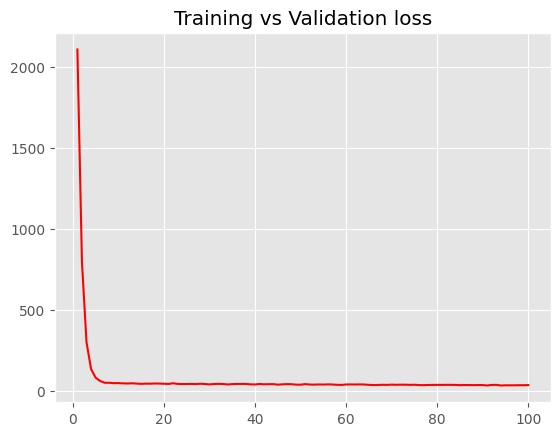

In [53]:
# let's create plot for training and validation error
plt.style.use("ggplot")
epoch_iter= [i+1 for i in range(num_epochs)]
plt.title("Training vs Validation loss")
plt.plot(epoch_iter, loss_per_epoch, c='r', label = "Training Loss")
plt.plot(epoch_iter, val_loss_per_epoch, c='b',label = "Validation Loss")
plt.legend()
plt.xlabel('Number of epoch')
plt.ylabel('Loss')
plt.show()

### Exercise 4

<b><div style="text-align: right">[POINTS: 1]</div></b>
Your task is to find the predictions made by your model on test data `test_x` and computing error between predicted and actual test labels.

Note:  The predicted value must be stored in variable `predicted`
     The error value must be stored in variable `error`

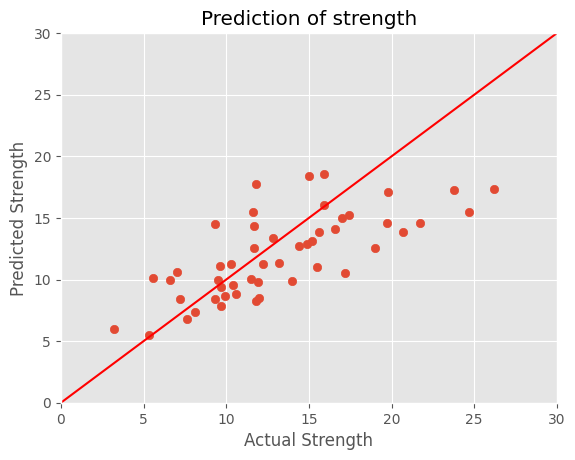

In [54]:
### Ex-4-Task-1

# Let's see the prediction on the test data.
predicted = None
error = None
### BEGIN SOLUTION
# your code here
predicted = model(test_X)
error = loss(predicted, test_Y)
### END SOLUTION
plt.title("Prediction of strength")
plt.scatter(test_Y, predicted.detach().numpy())
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c='r')
plt.show()

In [55]:
### READ ONLY
assert predicted is not None
assert error is not None

grader.add_case({'ex4_task1':{'predicted':predicted,'error':error}})

In [56]:
### BEGIN TEMP BLOCK
grader.make_pickle()
### END TEMP BLOCK

In [57]:
### BEGIN TEMP BLOCK
import pickle
with open('python-l1-4-source.pkl', 'rb') as f:
    pkl = pickle.load(f)
### END TEMP BLOCK

In [58]:
# INTIONALLY LEFT BLANK

In [59]:
print("Training loss: ", error.detach().numpy())

Training loss:  13.9486


we can visualize tensorboard. It is an advanced experiment tracking tool.

In [60]:
%tensorboard --logdir logs